In [2]:
import pandas as pd
import matplotlib.pyplot as plt


### Looking into the data:


In [3]:
#loading data and using head() function to read the data

data = pd.read_csv('laptop_price.csv',encoding = "latin-1")
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
#.info() is used to know the datatype, the count of non null values, columns
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
#.nunique() shows the number of unique values each column has.

data.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [6]:
#drop the unwanted features from the dataset and copy the dataset to new variable
num_data = data.drop(columns=["laptop_ID","Product","TypeName","Gpu","ScreenResolution"])
num_data.head()

,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,Apple,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69
1,Apple,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00
3,Apple,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45
4,Apple,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60


In [7]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Inches       1303 non-null   float64
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   object 
 4   Memory       1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   object 
 7   Price_euros  1303 non-null   float64
dtypes: float64(2), object(6)
memory usage: 81.6+ KB


In [8]:
#.isnull().sum() checks is there any null values or not 


num_data.isnull().sum()

Company        0
Inches         0
Cpu            0
Ram            0
Memory         0
OpSys          0
Weight         0
Price_euros    0
dtype: int64

In [9]:
num_data["Cpu"].dtypes

dtype('O')

In [11]:
def unique_val(num_data=num_data):
    for col in num_data:
        if num_data[col].dtype=="object":
            print(f"{col} = {num_data[col].unique()}")

In [13]:
#compressing the data in "cpu" column.
for i in ["i3","i5","i7","i9","Samsung","AMD", "m3"]:
    for j in range(1303):
        if i in str(num_data["Cpu"][j]):
            num_data["Cpu"][j] = i
num_data.head(5)

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\329217094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Cpu"][j] = i


,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,Apple,13.3,i5,8GB,128GB SSD,macOS,1.37kg,1339.69
1,Apple,13.3,i5,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,HP,15.6,i5,8GB,256GB SSD,No OS,1.86kg,575.00
3,Apple,15.4,i7,16GB,512GB SSD,macOS,1.83kg,2537.45
4,Apple,13.3,i5,8GB,256GB SSD,macOS,1.37kg,1803.60


In [14]:
for j in range(1303):
    if "Intel" in str(num_data["Cpu"][j]):
        num_data["Cpu"][j] = "Intel"

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\1340371518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Cpu"][j] = "Intel"


In [15]:
#coverting the "weight " column in "int".
str(num_data["Weight"][0])[:-2]

'1.37'

In [16]:
for i in range(1303):
    num_data["Weight"][i] = float(str(num_data["Weight"][i])[:-2])

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\2656549055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Weight"][i] = float(str(num_data["Weight"][i])[:-2])


In [17]:
num_data.head()

,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,Apple,13.3,i5,8GB,128GB SSD,macOS,1.37,1339.69
1,Apple,13.3,i5,8GB,128GB Flash Storage,macOS,1.34,898.94
2,HP,15.6,i5,8GB,256GB SSD,No OS,1.86,575.00
3,Apple,15.4,i7,16GB,512GB SSD,macOS,1.83,2537.45
4,Apple,13.3,i5,8GB,256GB SSD,macOS,1.37,1803.60


In [18]:
num_data["SSD"] = num_data.iloc[:,0]

In [19]:
#converting the "SSD" coloumn in int type, using only binary values,  i.e, is SSD is present then '1',
#if not, then '0'.
for i in range(1303):
    if "SSD" in num_data["Memory"][i]:
        num_data["SSD"][i]=1
    else:
        num_data["SSD"][i]=0
num_data.head()

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\1270935327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["SSD"][i]=1
C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\1270935327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["SSD"][i]=0


,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,Apple,13.3,i5,8GB,128GB SSD,macOS,1.37,1339.69,1
1,Apple,13.3,i5,8GB,128GB Flash Storage,macOS,1.34,898.94,0
2,HP,15.6,i5,8GB,256GB SSD,No OS,1.86,575.00,1
3,Apple,15.4,i7,16GB,512GB SSD,macOS,1.83,2537.45,1
4,Apple,13.3,i5,8GB,256GB SSD,macOS,1.37,1803.60,1


In [20]:
#conerting values in "memory" column into int type.

for i in [16 , 32, 64, 128, 240, 256, 512, 500, 8, 180, 508, 1.0, 2.0]:
    for j in range(1303):
        if str(i) in str(num_data["Memory"][j]):
            num_data["Memory"][j] = i
num_data.head()

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\3307900374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Memory"][j] = i


,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,Apple,13.3,i5,8GB,8,macOS,1.37,1339.69,1
1,Apple,13.3,i5,8GB,8,macOS,1.34,898.94,0
2,HP,15.6,i5,8GB,256,No OS,1.86,575.00,1
3,Apple,15.4,i7,16GB,512,macOS,1.83,2537.45,1
4,Apple,13.3,i5,8GB,256,macOS,1.37,1803.60,1


In [21]:
for i in range(1303):
    try:
        if "TB" in num_data["Memory"][i]:
            if ("1" and "+" in num_data["Memory"][i]) or ("2" in num_data["Memory"][i]):
                num_data["Memory"][i] =2
            else :
                num_data["Memory"][i] =1
    except:
        continue
num_data.head()

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\418412087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Memory"][i] =1
C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\418412087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Memory"][i] =2


,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,Apple,13.3,i5,8GB,8,macOS,1.37,1339.69,1
1,Apple,13.3,i5,8GB,8,macOS,1.34,898.94,0
2,HP,15.6,i5,8GB,256,No OS,1.86,575.00,1
3,Apple,15.4,i7,16GB,512,macOS,1.83,2537.45,1
4,Apple,13.3,i5,8GB,256,macOS,1.37,1803.60,1


In [22]:
unique_val()

Company = ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Cpu = ['i5' 'i7' 'AMD' 'i3' 'm3' 'Intel' 'Samsung']
Ram = ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Memory = [8 256 512 500 1 32 64 2 16 240]
OpSys = ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Weight = [1.37 1.34 1.86 1.83 2.1 2.04 1.3 1.6 2.2 0.92 1.22 0.98 2.5 1.62 1.91 2.3
 1.35 1.88 1.89 1.65 2.71 1.2 1.44 2.8 2.0 2.65 2.77 3.2 0.69 1.49 2.4
 2.13 2.43 1.7 1.4 1.8 1.9 3.0 1.252 2.7 2.02 1.63 1.96 1.21 2.45 1.25 1.5
 2.62 1.38 1.58 1.85 1.23 1.26 2.16 2.36 2.05 1.32 1.75 0.97 2.9 2.56 1.48
 1.74 1.1 1.56 2.03 1.05 4.4 1.29 1.95 2.06 1.12 1.42 3.49 3.35 2.23 4.42
 2.69 2.37 4.7 3.6 2.08 4.3 1.68 1.41 4.14 2.18 2.24 2.67 2.14 1.36 2.25
 2.15 2.19 2.54 3.42 1.28 2.33 1.45 2.79 1.84 2.6 2.26 3.25 1.59 1.13 1.78
 1.15 1.27 1.43 2.31 1.16 1.64 2.

In [23]:
#converting "RAM" into int.
for i in range(1303):
    num_data["Ram"][i]= int(str(num_data["Ram"][i])[:-2])
num_data.head()

C:\Users\Kanika Dogra\AppData\Local\Temp\ipykernel_3932\1902838280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["Ram"][i]= int(str(num_data["Ram"][i])[:-2])


,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,Apple,13.3,i5,8,8,macOS,1.37,1339.69,1
1,Apple,13.3,i5,8,8,macOS,1.34,898.94,0
2,HP,15.6,i5,8,256,No OS,1.86,575.00,1
3,Apple,15.4,i7,16,512,macOS,1.83,2537.45,1
4,Apple,13.3,i5,8,256,macOS,1.37,1803.60,1


In [24]:
num_data["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [25]:
num_data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [26]:
df = num_data.replace({'Mac OS X': "macOS", 'Windows 10 S':'Windows 10',
                            'No OS': 'Windows 10'})
df.head()

,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,Apple,13.3,i5,8,8.0,macOS,1.37,1339.69,1
1,Apple,13.3,i5,8,8.0,macOS,1.34,898.94,0
2,HP,15.6,i5,8,256.0,Windows 10,1.86,575.00,1
3,Apple,15.4,i7,16,512.0,macOS,1.83,2537.45,1
4,Apple,13.3,i5,8,256.0,macOS,1.37,1803.60,1



### Encoding :

In [29]:
df["Cpu"].unique()

array(['i5', 'i7', 'AMD', 'i3', 'm3', 'Intel', 'Samsung'], dtype=object)

In [30]:
# Arranging the companies according to their market value
#Arranging the Os according to the use and value
#Arraning the Cpu according to the use and demand

Com = ['Vero', 'Razer', 'Mediacom' ,'Chuwi','Fujitsu','Toshiba', 'Huawei', 'Xiaomi','LG',
    'Dell','Acer','Google','HP','Microsoft','Samsung', 'Lenovo','Asus','MSI', 'Apple']
os = ['Android','Chrome OS', 'Linux','Windows 7','Windows 10','macOS']
cpu = [ 'Intel', 'i3','i5', 'i7', 'AMD', 'Samsung', 'm3']

In [31]:
#using the ordinal method for providing int values to each element of the data.
from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder(categories=[Com])
enc2 = OrdinalEncoder(categories=[os])
enc3 = OrdinalEncoder(categories=[cpu])

In [32]:
#fit the encoded values to the data.
df["Company"] = enc1.fit_transform(df[["Company"]])
df["OpSys"] = enc2.fit_transform(df[["OpSys"]])
df["Cpu"] = enc3.fit_transform(df[["Cpu"]])

df.head()



,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,SSD
0,18.0,13.3,2.0,8,8.0,5.0,1.37,1339.69,1
1,18.0,13.3,2.0,8,8.0,5.0,1.34,898.94,0
2,12.0,15.6,2.0,8,256.0,4.0,1.86,575.00,1
3,18.0,15.4,3.0,16,512.0,5.0,1.83,2537.45,1
4,18.0,13.3,2.0,8,256.0,5.0,1.37,1803.60,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   float64
 1   Inches       1303 non-null   float64
 2   Cpu          1303 non-null   float64
 3   Ram          1303 non-null   int64  
 4   Memory       1303 non-null   float64
 5   OpSys        1303 non-null   float64
 6   Weight       1303 non-null   float64
 7   Price_euros  1303 non-null   float64
 8   SSD          1303 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 91.7 KB


### Modeling :  💃

In [34]:
import seaborn as sns

##### Correlation :

In [35]:
#find correlation between the features
#sort the values according to the correaltion. 
cor= df.corr()
print(cor["Price_euros"].sort_values(ascending=False))

Price_euros    1.000000
Ram            0.743007
SSD            0.513609
Cpu            0.440366
Memory         0.290819
Weight         0.210370
OpSys          0.167033
Inches         0.068197
Company        0.039572
Name: Price_euros, dtype: float64


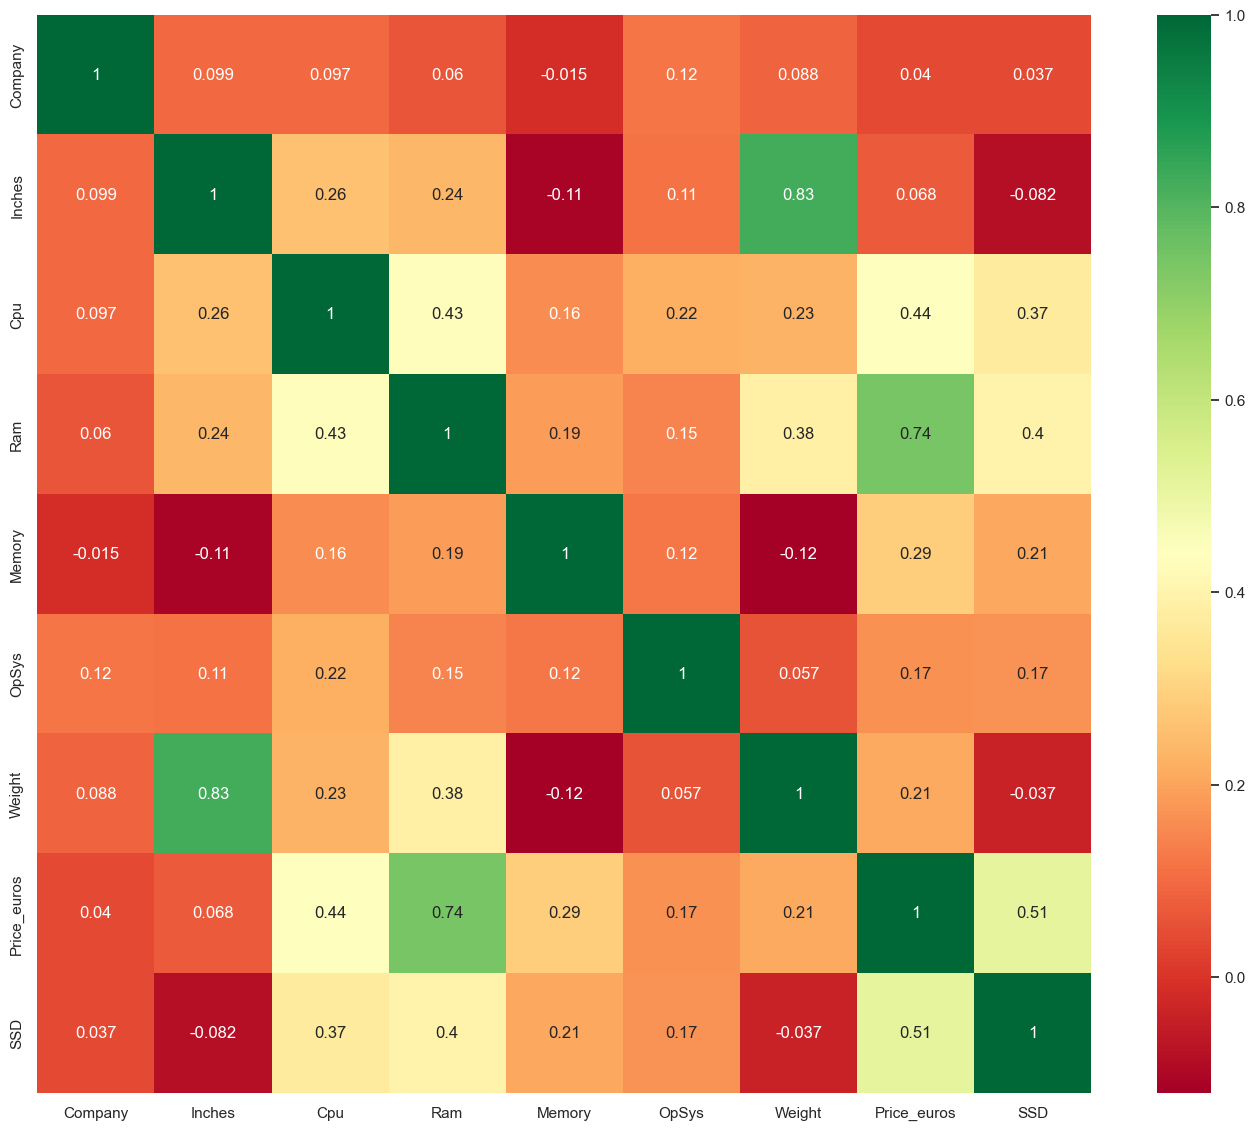

In [36]:
corrmat = df.corr()
corrmat = corrmat["Price_euros"]
top_corr_fts = corrmat.index
sns.set(rc={'figure.figsize':(17,14)})
g=sns.heatmap(df[top_corr_fts].corr(),annot=True,cmap="RdYlGn")

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
#creating X variable for features
#setting target in y
X = df.drop(columns="Price_euros")
y = df.Price_euros

In [42]:
#trai_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((261, 8), (261,), (1042, 8), (1042,))

In [44]:
#fit the train data, and predict on test data.

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(y_test, y_pred)

288.6815800733311

In [47]:
model1.score(X_test,y_test)

0.6644836898419373

In [48]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [49]:
mean_absolute_error(y_test, y_pred)

200.79155871563194

In [50]:
model2.score(X_test,y_test)

0.8070640536464063

In [ ]:
# from joblib import dump
# dump(model2, "model.joblib")

In [51]:
X_test.head()

,Company,Inches,Cpu,Ram,Memory,OpSys,Weight,SSD
644,10.0,15.6,1.0,4,500.0,4.0,2.40,0
1275,16.0,13.3,0.0,8,512.0,4.0,1.20,1
163,15.0,15.6,3.0,16,256.0,4.0,2.50,1
1008,12.0,14.0,2.0,8,256.0,4.0,1.64,1
909,8.0,14.0,3.0,8,512.0,4.0,0.98,1
